In [1]:
"""
Ce fichier analyse comment l'evolutin de la distance meandre d'une valeur assez 
grandre a une valuer tres petite influence la frequence de raisonnance

Dans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree
"""

"\nCe fichier analyse comment l'evolutin de la distance meandre d'une valeur assez \ngrandre a une valuer tres petite influence la frequence de raisonnance\n\nDans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree\n"

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *

fC      = 868e6  # fréquence centrale en Hz
delta_f = 4e6  # écart entre les échantillons en Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 31     # nombre d'échantillons

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")

In [3]:
fC      = 868e6
fLow    = 700e6
fHigh   = 1000e6

nPoints = calculate_nPoints(fLow, fHigh, fC, 52)
accuracy= 0.01
print(f"nPoints = {nPoints}")
frequencies = np.linspace(fLow, fHigh, nPoints)
fc_index = np.where(frequencies == fC)[0][0]
print(f"fc_index = {fc_index}")

nPoints = 76
fc_index = 42


In [4]:
mesh_name = "ifa_meander_anlyse_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_anlyse_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [ ]:
a = 15 / 1000  # Largeur
b = 30 / 1000  # Hauteur

terminal_a = 50 / 1000
terminal_b = b
x_t = np.array([-terminal_a, 0, 0, -terminal_a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
largeur_piste    = a / 10          # Valeur Minimale    
distance_meandre = a / 10          # Valeur choisie en fonction du resulat de analyse_dist_meandre.ipynb
feed             = 0.4 * b          # Valuer Positionné a la moitié du ground plane -- 25 mm
feed_point       = [0, feed, 0]      # On alimente au short feed
mesh_size = 3 * largeur_piste

# Affichage des valeurs
print(f"largeur_piste = {largeur_piste * 1000:.2f} mm")
print(f"distance_meandre = {distance_meandre * 1000:.2f} mm")
print(f"feed = {feed * 1000:.2f} mm")
print(f"mesh_size = {mesh_size * 1000:.2f} mm")

largeur_piste = 2.00 mm
distance_meandre = 2.00 mm
feed = 12.00 mm
mesh_size = 6.00 mm


In [6]:
def creation_ifa(largeur, hauteur, width, dist_meandre, x_t, y_t, save_mesh_folder, mesh_name, mesh_size):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width                    # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [7]:
def plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC=None):
    from matplotlib import pyplot as plt
    frequencies = np.linspace(fLow, fHigh, nPoints)
    frequencies_mhz = np.array(frequencies) / 1e6
    s11_db = np.array(s11_db)

    # Trouver le minimum de S11
    min_index = np.argmin(s11_db)
    f_resonance = frequencies[min_index] / 1e6
    s11_min = s11_db[min_index]

    # Tracé
    fig_size = 7
    Fibonacci = (1 + np.sqrt(5)) / 2
    plt.figure(figsize=(fig_size, fig_size / Fibonacci))
    plt.plot(frequencies_mhz, s11_db, label="S11 (dB)", color='blue')
    plt.plot(f_resonance, s11_min, 'ro', 
            label=f"Résonance: {f_resonance:.2f} MHz (S11={s11_min:.2f} dB)")
    
    if fC:
        fC_mhz = fC / 1e6
        idx_fc = np.argmin(np.abs(frequencies - fC))
        s11_fc = s11_db[idx_fc]
        plt.axvline(fC_mhz, color='green', linestyle='--', 
                   label=f"fC = {fC_mhz:.2f} MHz (S11={s11_fc:.2f} dB)")

    plt.xlabel("Fréquence (MHz)")
    plt.ylabel("S11 (dB)")
    plt.title("Courbe de S11 vs Fréquence")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Iteration N°1
distance meandres = 2.0 mm
Largeur de piste ifa = 2.0 mm
position feed = 12.0 mm

Number of meanders = 5
New distance meandres = 2.0 mm

Simulation 1/76 | f = 700.00 MHz | S11 = -0.06 dB
Simulation 2/76 | f = 704.00 MHz | S11 = -0.07 dB
Simulation 3/76 | f = 708.00 MHz | S11 = -0.07 dB
Simulation 4/76 | f = 712.00 MHz | S11 = -0.07 dB
Simulation 5/76 | f = 716.00 MHz | S11 = -0.08 dB
Simulation 6/76 | f = 720.00 MHz | S11 = -0.08 dB
Simulation 7/76 | f = 724.00 MHz | S11 = -0.09 dB
Simulation 8/76 | f = 728.00 MHz | S11 = -0.09 dB
Simulation 9/76 | f = 732.00 MHz | S11 = -0.10 dB
Simulation 10/76 | f = 736.00 MHz | S11 = -0.10 dB
Simulation 11/76 | f = 740.00 MHz | S11 = -0.11 dB
Simulation 12/76 | f = 744.00 MHz | S11 = -0.11 dB
Simulation 13/76 | f = 748.00 MHz | S11 = -0.12 dB
Simulation 14/76 | f = 752.00 MHz | S11 = -0.12 dB
Simulation 15/76 | f = 756.00 MHz | S11 = -0.13 dB
Simulation 16/76 | f = 760.00 MHz | S11 = -0.14 dB
Simulation 17/76 | f = 764.00 MHz | S11 =

Simulation 43/76 | f = 868.00 MHz | S11 = -0.69 dB
Simulation 44/76 | f = 872.00 MHz | S11 = -0.74 dB
Simulation 45/76 | f = 876.00 MHz | S11 = -0.80 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -0.86 dB
Simulation 47/76 | f = 884.00 MHz | S11 = -0.93 dB
Simulation 48/76 | f = 888.00 MHz | S11 = -1.01 dB
Simulation 49/76 | f = 892.00 MHz | S11 = -1.10 dB
Simulation 50/76 | f = 896.00 MHz | S11 = -1.19 dB
Simulation 51/76 | f = 900.00 MHz | S11 = -1.30 dB
Simulation 52/76 | f = 904.00 MHz | S11 = -1.42 dB
Simulation 53/76 | f = 908.00 MHz | S11 = -1.56 dB
Simulation 54/76 | f = 912.00 MHz | S11 = -1.71 dB
Simulation 55/76 | f = 916.00 MHz | S11 = -1.88 dB
Simulation 56/76 | f = 920.00 MHz | S11 = -2.07 dB
Simulation 57/76 | f = 924.00 MHz | S11 = -2.29 dB
Simulation 58/76 | f = 928.00 MHz | S11 = -2.55 dB
Simulation 59/76 | f = 932.00 MHz | S11 = -2.83 dB
Simulation 60/76 | f = 936.00 MHz | S11 = -3.16 dB
Simulation 61/76 | f = 940.00 MHz | S11 = -3.54 dB
Simulation 62/76 | f = 944.00 M

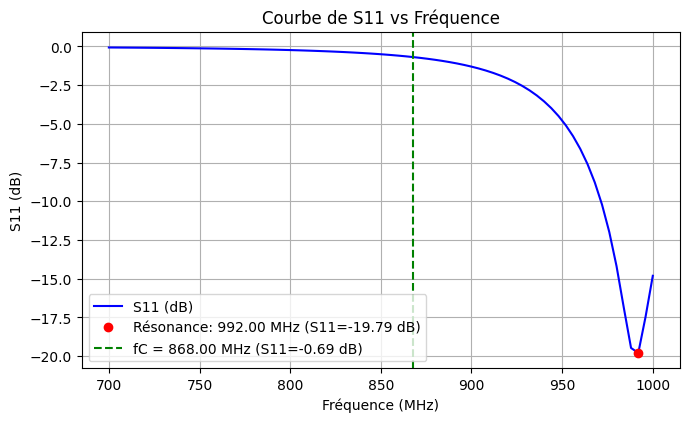


Ratio = 1.1428571428571428


We are FAR of fc!


Iteration N°2
distance meandres = 1.53125 mm
Largeur de piste ifa = 1.53125 mm
position feed = 12.0 mm

Number of meanders = 6
New distance meandres = 1.8020833333333335 mm

Simulation 1/76 | f = 700.00 MHz | S11 = -0.11 dB
Simulation 2/76 | f = 704.00 MHz | S11 = -0.11 dB
Simulation 3/76 | f = 708.00 MHz | S11 = -0.12 dB
Simulation 4/76 | f = 712.00 MHz | S11 = -0.13 dB
Simulation 5/76 | f = 716.00 MHz | S11 = -0.14 dB
Simulation 6/76 | f = 720.00 MHz | S11 = -0.15 dB
Simulation 7/76 | f = 724.00 MHz | S11 = -0.16 dB
Simulation 8/76 | f = 728.00 MHz | S11 = -0.17 dB
Simulation 9/76 | f = 732.00 MHz | S11 = -0.18 dB
Simulation 10/76 | f = 736.00 MHz | S11 = -0.19 dB
Simulation 11/76 | f = 740.00 MHz | S11 = -0.20 dB
Simulation 12/76 | f = 744.00 MHz | S11 = -0.22 dB
Simulation 13/76 | f = 748.00 MHz | S11 = -0.23 dB
Simulation 14/76 | f = 752.00 MHz | S11 = -0.25 dB
Simulation 15/76 | f = 756.00 MHz | S11 = -0.27 dB
Simulation 16/76 | f

In [ ]:
import time
start_time = time.time()
iteration = 1
max_iter = 20
Accuracy = 0.01
while iteration <= max_iter:
    try:
        print(f"\nIteration N°{iteration}")
        print(f"distance meandres = {distance_meandre * 1000} mm")
        print(f"Largeur de piste ifa = {largeur_piste * 1000} mm")
        print(f"position feed = {feed * 1000} mm\n")
        N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, x_t, y_t, save_mesh_folder, mesh_name, mesh_size=1.5*largeur_piste)
        print(f"Number of meanders = {N_list_elem}")
        print(f"New distance meandres = {new_distance_meandre_elem * 1000} mm\n")
        frequence_resonance, s11_db, R_res, X_res = simulate(frequencies, ifa_meander_mat, fC, feed_point)
        # plot(s11_db)
        plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)

        ratio = frequence_resonance / fC
        print(f"\nRatio = {ratio}\n")
        # distance_meandre = distance_meandre / ratio

        if (abs((fC - frequence_resonance)/fC) < Accuracy):
            min_index = np.argmin(s11_db)
            min_s11 = s11_db[min_index]
            s11_fc = s11_db[fc_index]
            """ print("\nRequired Accuracy is met!")
            break """
            if s11_fc < -10 or min_s11 < -20:
                print("\nRequired Accuracy is met!")
                break
            else:
                print("\nOn cherche le matching !!!")
                # feed          = feed * (R_res / 50)

                print(f"\nresultat X_res / 50 = {X_res / 50}")
                print(f"\nresultat R_res / 50 = {R_res / 50}")

                feed_adjustment_factor = max(abs(X_res), abs(R_res)) / 50

                if ratio == 1:
                    print("Meilleur resulat possible obtennue")
                    break

                feed = max(min(feed * ratio**2, b - 3 * largeur_piste / 2 - 0.5 / 1000), largeur_piste / 2)

                print(f"\nresultat feed = {feed*1000} mm")

                if feed == b - largeur_piste - 0.5 / 1000 or feed == largeur_piste / 2:
                    distance_meandre = distance_meandre / (ratio**2)
                    largeur_piste = largeur_piste / ratio**2

                feed_point       = [0, feed, 0]

        elif abs(frequence_resonance - fC) < 0.02 * fC:
            print(f"\nWe are within 2% of fc!\n")
            # largeur_piste = largeur_piste * ratio**1
            feed = max(min(feed * ratio**2, b - 3 * largeur_piste / 2 - 0.5 / 1000), largeur_piste / 2)

            if feed == b - largeur_piste - 0.5 / 1000 or feed == largeur_piste / 2:
                print("\nBord extreme atteint\n")
                distance_meandre = distance_meandre / (ratio**2)
                largeur_piste = largeur_piste / ratio**2
            
            feed_point       = [0, feed, 0]
        else:
            print(f"\nWe are FAR of fc!\n")
            distance_meandre = distance_meandre / (ratio**2)
            largeur_piste = largeur_piste / ratio**2
        
        if (iteration == max_iter):
            print("Convergence non atteinte, nombre max d'itteration atteint ----> Meilleurs resultats")
        iteration += 1
    except ValueError as e:
        print(f"Error: {e}")

end_time = time.time()
simulation_time = end_time - start_time
simulation_time_minutes = simulation_time / 60
simulation_time_seconds = simulation_time % 60
print(f"Temps total de simulation: {math.floor(simulation_time_minutes)} minutes ; {simulation_time_seconds:.2f} secondes")

In [ ]:
lower_bound = fC * (1 - 0.02)
upper_bound = fC * (1 + 0.02)
print('In the 2%')
print(f"Les fréquences qui bordent les 2% sont : {lower_bound*1e-6} Hz et {upper_bound*1e-6} Hz")

lower_bound = fC * (1 - 0.03)
upper_bound = fC * (1 + 0.03)
print('In the 3%')
print(f"Les fréquences qui bordent les 2% sont : {lower_bound*1e-6} Hz et {upper_bound*1e-6} Hz")

In the 2%
Les fréquences qui bordent les 2% sont : 850.64 Hz et 885.36 Hz
In the 3%
Les fréquences qui bordent les 2% sont : 841.9599999999999 Hz et 894.04 Hz


In [ ]:
def plot(s11_db):
    from matplotlib import pyplot as plt
    # Conversion des fréquences de résonance en MHz
    frequencies_mhz = np.array(frequencies) * 1e-6

    # Trouver l'indice de la valeur minimale de s11_db
    min_index = np.argmin(s11_db)
    min_frequency = frequencies_mhz[min_index]
    min_s11 = s11_db[min_index]

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_mhz, s11_db, linestyle='-', color='b', label='S11 (dB)')

    # Mettre en évidence la fréquence où S11 est la plus basse
    plt.axvline(x=min_frequency, color='r', linestyle='--', label=f'Fréquence min = {min_frequency:.2f} MHz')
    plt.scatter([min_frequency], [min_s11], color='g', label=f'S11 min = {min_s11:.2f} dB')

    plt.xlabel('Fréquences de résonance (MHz)')
    plt.ylabel('S11 (dB)')
    plt.title('S11 en fonction des fréquences de résonance')
    plt.legend()
    plt.grid(True)
    plt.show()